In [1]:
# Modules being called
import math as m
import numpy as np
from sympy.solvers import solve
import sympy as sp
from matplotlib import pyplot as plt
import pandas as pd

In [30]:
def dB_dt(blue, fin):
    growth_Blue = 0.05*blue*(1-blue/150000)
    competition_Blue = m.pow(10,-8)*blue*fin
    dBxdt = growth_Blue - competition_Blue
    return dBxdt
    
    
def dF_dt(blue, fin):
    growth_Fin = 0.08*fin*(1-fin/400000)
    competition_Fin = m.pow(10,-8)*blue*fin
    dFxdt = growth_Fin - competition_Fin
    return dFxdt

In [31]:
x, y = np.linspace(0, 200000), np.linspace(0, 450000)

In [32]:
dB_dt(0,0)

# Test Shark Problem

In [24]:
# Growth Rates: (g_Sharks = g_X, Sharks = X); (g_Seals = g_Y, Seals = Y)
X, Y = sp.symbols('X Y')

# I realized after the test so I made the correction. I uzed "X" instead of "Y"
g_X, g_Y = 0.03 * X * (1 - X/45000), 0.07 * Y * (1 - Y/150000) 

# Competition Terms: (c_Sharks = c_X, Sharks = X); (c_Seals = c_Y, Seals = Y)
c_X, c_Y = (0.02/150000)*X*Y, (0.06/45000)*X*Y

# dX/dt and dY/dt
dXdt, dYdt = g_X + c_X, g_Y - c_Y
sp.init_printing()

In [33]:
def dX_dt(sharks, seals):
    gX = 0.03 * sharks * (1 - sharks/45000)
    cX = (0.02/150000)*sharks*seals
    diffX_dt = gX + cX
    return diffX_dt


def dY_dt(sharks, seals):
    gY = 0.06 * Y * (1 - X/150000)
    cY = (0.06/45000)*X*Y
    diffY_dt = gY - cY
    return diffY_dt

## Equilibrium Points

In [34]:
solve([dXdt,dYdt], X, Y)

## Nullclines

In [35]:
solve([dXdt], X)[0]

In [36]:
solve([dXdt], X)[1]

In [37]:
solve([dYdt], Y)[0]

In [38]:
solve([dYdt], Y)[1]

## Plot

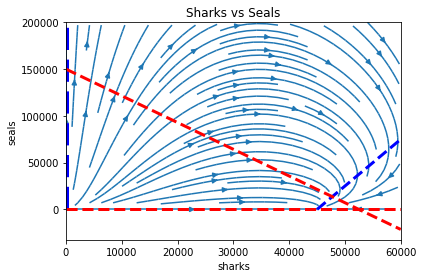

In [40]:
x, y = np.linspace(0, 60000), np.linspace(0, 200000)
X, Y = np.meshgrid(x, y)
U, V = dX_dt(X, Y), dY_dt(X, Y)
X1, X2, Y1, Y2 = 0.2*y + 45000.0, 0 * y, -2.85714285714286*x+150000.0, 0 * x
fig, ax1 = plt.subplots()
ax1.streamplot(X, Y, U, V)
ax1.plot(X1, y, color= 'b', ls= '--', lw= 3, label= 'shark-nullcline')
ax1.plot(X2, y, color= 'b', ls= '--', lw= 6)
ax1.plot(x, Y1, color= 'r', ls= '--', lw= 3, label= 'seal-nullcline')
ax1.plot(x, Y2, color= 'r', ls= '--', lw= 3)
ax1.set(xlabel= 'sharks', ylabel= 'seals', title= 'Sharks vs Seals', xlim= (0, 60000));
